---
# Introduction to Machine Learning - Lab 3
---

Following are the steps to import a dataset (bill_authentication.csv) and preparing the decision tree.

---
### Importing Libraries and Dataset, Splitting into Training/Test Data
---

In [5]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier


SEED = 42

data = load_wine()
x=data.data
y=data.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

---
### Preparing the Decision Tree
---

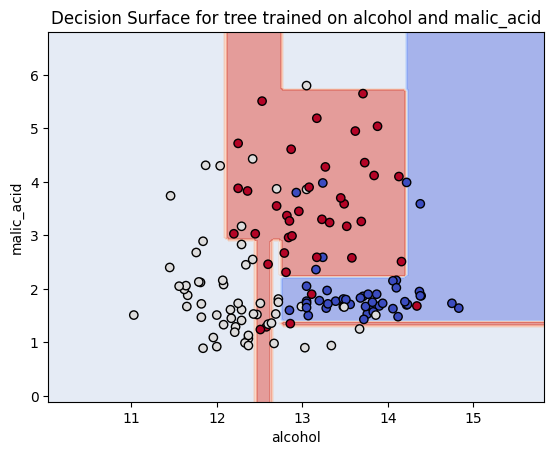

In [6]:
X_train_cols = X_train[:, :2]
classifier = DecisionTreeClassifier(
    max_depth=4, random_state=SEED).fit(X_train_cols, y_train)
disp = DecisionBoundaryDisplay.from_estimator(classifier, X_train_cols, response_method="predict",
                                              xlabel=data.feature_names[0], ylabel=data.feature_names[1], alpha=0.5, cmap=plt.cm.coolwarm)

disp.ax_.scatter(X_train_cols[:, 0], X_train_cols[:, 1], c=y_train,
                edgecolor="k", cmap=plt.cm.coolwarm, edgecolors='k')
plt.title(
    f"Decision Surface for tree trained on {data.feature_names[0]} and {data.feature_names[1]}")
plt.show()


---
### Preparing the Combinations
---

In [10]:
from itertools import combinations
import numpy as np

comb=combinations(np.arange(0,6),2)

unique_combinations=set(comb)

---
### Making the Decision surface of a decision tree using paired features
---

/tmp/ipykernel_12912/50895186.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_cols[idx, 0], X_train_cols[idx, 1], c=color,
/tmp/ipykernel_12912/50895186.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_cols[idx, 0], X_train_cols[idx, 1], c=color,
/tmp/ipykernel_12912/50895186.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_cols[idx, 0], X_train_cols[idx, 1], c=color,
/tmp/ipykernel_12912/50895186.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_cols[idx, 0], X_train_cols[idx, 1], c=color,
/tmp/ipykernel_12912/50895186.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_cols[idx, 0], X_train_cols[idx, 1], c=color,
/tmp/ipykernel_12912/50895186.

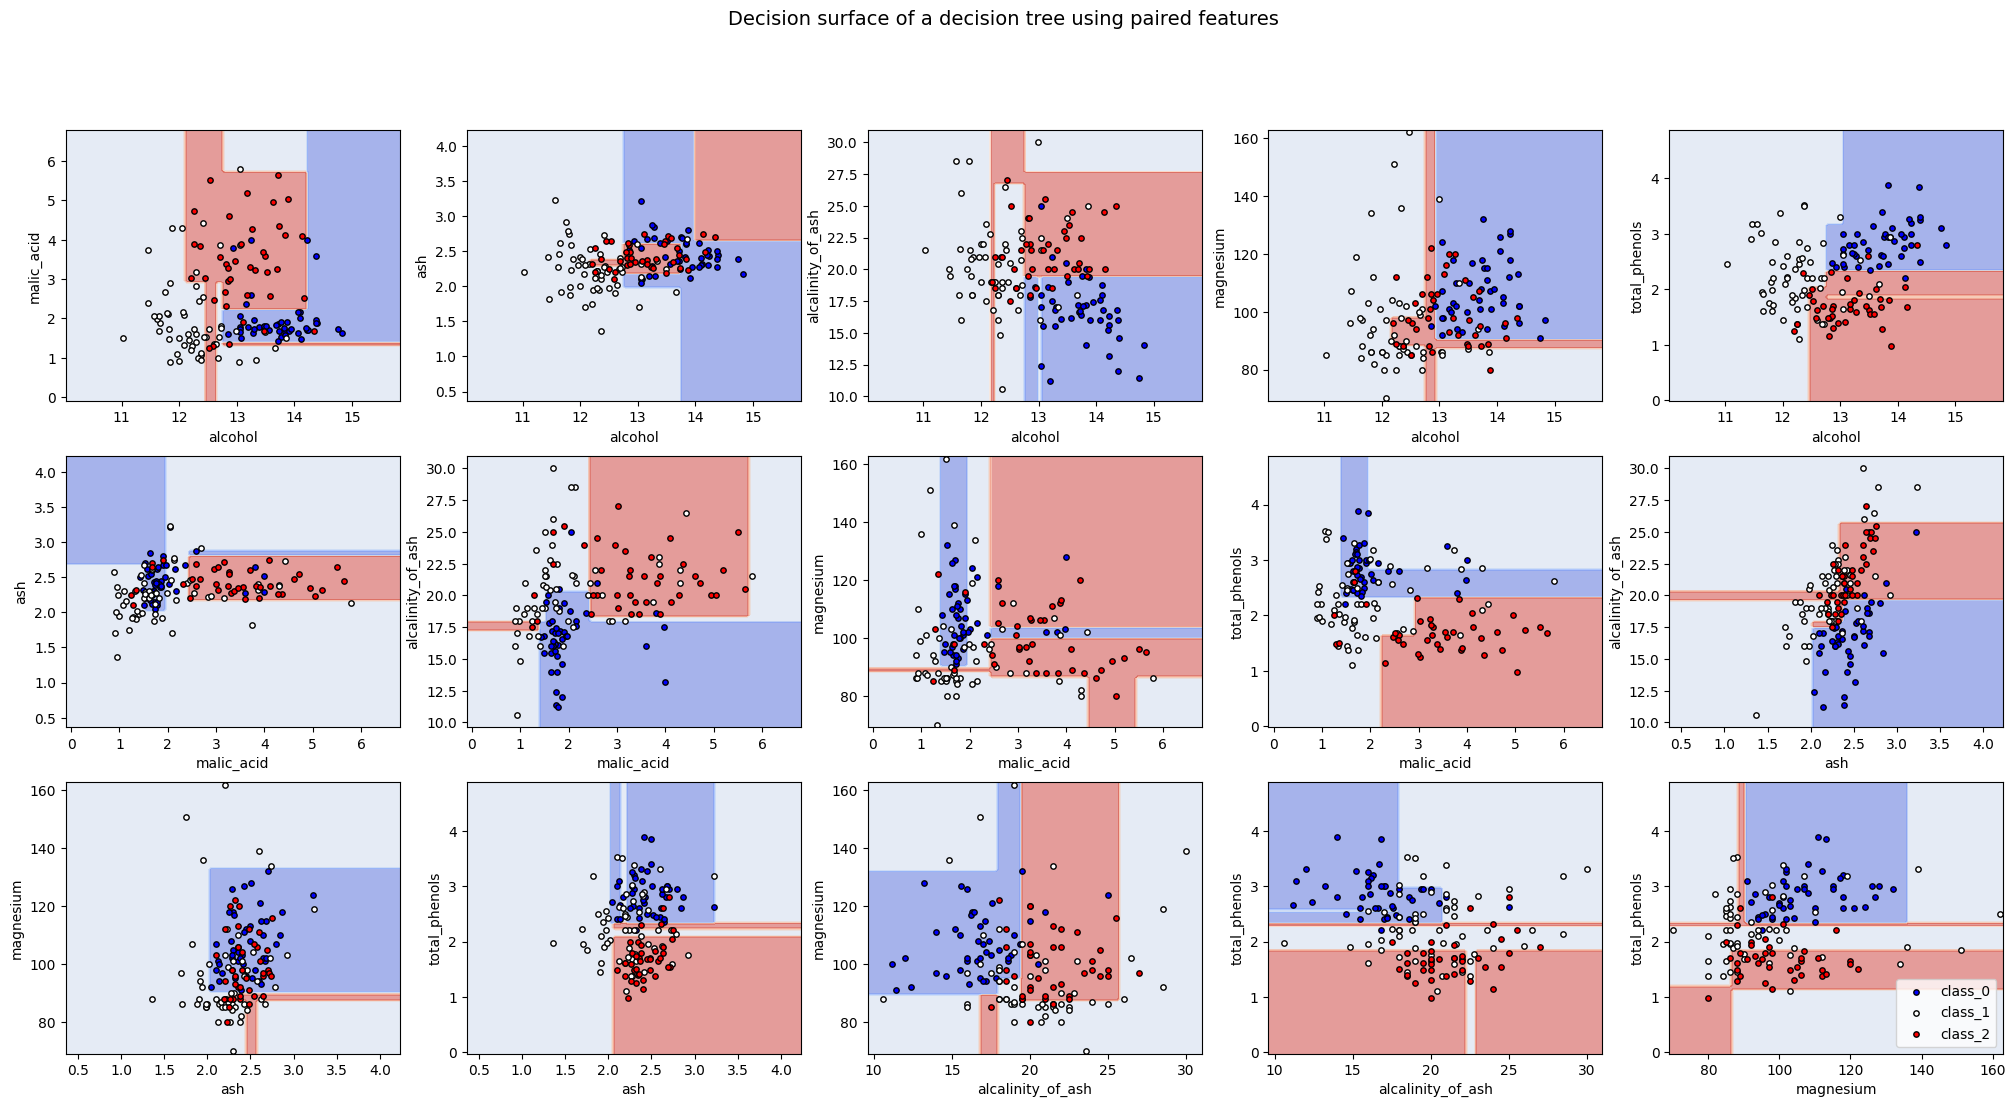

In [11]:
n_classes = 3
color_palette = plt.cm.coolwarm
plot_colors = "bwr"
plot_step = 0.02
plt.figure(figsize=(25, 12))
for pair_idx, pair in enumerate(sorted(unique_combinations)):
    X_train_cols = X_train[:, pair]
    classifier = DecisionTreeClassifier(
        max_depth=4, random_state=SEED).fit(X_train_cols, y_train)
    ax = plt.subplot(3, 5, pair_idx + 1)
    DecisionBoundaryDisplay.from_estimator(classifier, X_train_cols, cmap=color_palette, response_method="predict",
                                           ax=ax, xlabel=data.feature_names[pair[0]], ylabel=data.feature_names[pair[1]], alpha=0.5)
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_train == i)
        plt.scatter(X_train_cols[idx, 0], X_train_cols[idx, 1], c=color,
                    label=data.target_names[i], cmap=color_palette,edgecolors='black', s=15)
plt.suptitle("Decision surface of a decision tree using paired features",fontsize=14)
plt.legend(loc='lower right')